In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# percent cover data
df_pc = pd.read_table('relevant/percent_cover_zipcode.txt', delimiter = ',')
df_pc.columns = ['zip', 'pc_cover']
df_pc_nyc = df_pc.loc[(df_pc['zip'] >= 10001) & (df_pc['zip'] <= 11697)]

In [66]:
df_cities_zips = pd.read_csv('relevant/us_cities_zips.csv')
# nyc zip codes: 10001 to 11697
df_zip_nyc = df_cities_zips.loc[(df_cities_zips['zip_code'] >= 10001) & (df_cities_zips['zip_code'] <= 11697)]
df_zip_nyc_relevant = df_zip_nyc[['zip_code', 'population', 'density']]
df_zip_nyc_relevant.columns = ['zip', 'population', 'density']

In [67]:
# merge datasets
combined = pd.merge(df_zip_nyc_relevant, df_pc_nyc, how="outer")
combined = combined.dropna()

In [68]:
# covid data
df_hosprate = pd.read_csv('relevant/covid/hosprate-by-modzcta.csv')
df_deathrate = pd.read_csv('relevant/covid/deathrate-by-modzcta.csv')
df_percentpos = pd.read_csv('relevant/covid/percentpositive-by-modzcta.csv')

# df_hosprate = df_hosprate.transpose()
# df_hosprate.columns = df_hosprate.iloc[0]
# df_hosprate.drop(df_hosprate.index[0])

In [69]:
# get covid stats [hosp rate, death rate, percent pos] averaged by zip code across all months in 2020-current
temp = []
cols = df_hosprate.columns
for i in range(7, len(cols)):
    hosp_avg = np.nanmean(list(df_hosprate[df_hosprate.columns[i]]))
    death_avg = np.nanmean(list(df_deathrate[df_deathrate.columns[i]]))
    percentpos_avg = np.nanmean(list(df_percentpos[df_percentpos.columns[i]]))
    temp.append([cols[i][-5:], hosp_avg, death_avg, percentpos_avg])
    
covid_data = pd.DataFrame(data = temp, columns = ['zip', 'hosp_avg', 'death_avg', 'percentpos_avg'])
covid_data['zip']=covid_data['zip'].astype(int)

In [70]:
df_combined = combined.merge(covid_data, left_on='zip', right_on='zip')
df_combined

,zip,population,density,pc_cover,hosp_avg,death_avg,percentpos_avg
0,10001,25026.0,15489.3,2.612,37.754545,8.792857,5.624769
1,10002,74363.0,34916.7,11.836,71.197143,27.155000,7.029615
2,10003,54671.0,36928.8,6.273,27.411765,8.000000,5.488692
3,10004,3310.0,2805.2,24.690,67.271429,0.000000,5.929385
4,10005,8664.0,45907.6,2.109,28.066667,0.000000,5.970538
...,...,...,...,...,...,...,...
172,11691,68454.0,9849.6,22.408,82.045714,48.810526,7.458692
173,11692,22394.0,8511.5,22.596,68.820588,33.050000,7.366923
174,11693,13029.0,5088.1,34.662,62.324138,21.038889,7.904692
175,11694,21258.0,4697.4,3.773,67.843333,33.993750,7.152692


In [71]:
df_trees = pd.read_csv('./relevant/5_million_trees_NYC.csv').drop(columns=['Unnamed: 0'])

In [72]:
df_trees['condition_enc'] = df_trees['condition'].map({'nan': 0, 'poor': 1, 'fair': 2, 'good': 3})
df_trees['native_enc'] = df_trees['native'].map({'introduced': 0, 'naturally_occurring': 1})
df_trees

,common_name,scientific_name,zipcode,diameter_breast_height_CM,condition,native,diameter_breast_height_binned_CM,city_ID,most_recent_observation,condition_enc,native_enc
0,Red maple,Acer rubrum,11375.0,7.62,fair,naturally_occurring,0 to 15.24 cm,"180,683",8/27/2015,2.0,1.0
1,Pin oak,Quercus palustris,11357.0,53.34,fair,naturally_occurring,45.72 to 60.96 cm,"200,540",9/3/2015,2.0,1.0
2,Honeylocust,Gleditsia triacanthos,11211.0,7.62,good,introduced,0 to 15.24 cm,"204,026",9/5/2015,3.0,0.0
3,Honeylocust,Gleditsia triacanthos,11211.0,25.40,good,introduced,15.24 to 30.48 cm,"204,337",9/5/2015,3.0,0.0
4,American linden,Tilia americana,11215.0,53.34,good,naturally_occurring,45.72 to 60.96 cm,"189,565",8/30/2015,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
682848,Pin oak,Quercus palustris,11211.0,63.50,good,naturally_occurring,60.96 to 76.2 cm,"155,433",8/18/2015,3.0,1.0
682849,Kentucky yellowwood,Cladrastis kentukea,11375.0,17.78,good,introduced,15.24 to 30.48 cm,"183,795",8/29/2015,3.0,0.0
682850,Red maple,Acer rubrum,10314.0,30.48,good,naturally_occurring,15.24 to 30.48 cm,"166,161",8/22/2015,3.0,1.0
682851,Red maple,Acer rubrum,10457.0,22.86,good,naturally_occurring,15.24 to 30.48 cm,"184,028",8/29/2015,3.0,1.0


In [73]:
df_combined = df_combined.merge(df_trees.groupby('zipcode').mean(), left_on='zip', right_index=True)

In [74]:
df_combined.corr(method='pearson')

,zip,population,density,pc_cover,hosp_avg,death_avg,percentpos_avg,diameter_breast_height_CM,condition_enc,native_enc
zip,1.000000,0.121203,-0.497350,-0.084511,0.249738,0.378212,0.431914,0.596380,0.025952,0.179330
population,0.121203,1.000000,0.170590,-0.157248,0.188849,0.326195,-0.006186,0.150712,0.165187,0.067877
density,-0.497350,0.170590,1.000000,-0.200386,-0.355672,-0.288329,-0.476514,-0.446146,-0.127457,-0.211572
pc_cover,-0.084511,-0.157248,-0.200386,1.000000,0.113224,-0.020840,0.088810,-0.051849,-0.180711,0.083486
hosp_avg,0.249738,0.188849,-0.355672,0.113224,1.000000,0.745214,0.443094,0.135310,0.007562,0.239756
death_avg,0.378212,0.326195,-0.288329,-0.020840,0.745214,1.000000,0.328507,0.333588,0.126285,0.249868
percentpos_avg,0.431914,-0.006186,-0.476514,0.088810,0.443094,0.328507,1.000000,0.397087,0.000716,0.247753
diameter_breast_height_CM,0.596380,0.150712,-0.446146,-0.051849,0.135310,0.333588,0.397087,1.000000,0.442791,0.323314
condition_enc,0.025952,0.165187,-0.127457,-0.180711,0.007562,0.126285,0.000716,0.442791,1.000000,0.278807
native_enc,0.179330,0.067877,-0.211572,0.083486,0.239756,0.249868,0.247753,0.323314,0.278807,1.000000


In [75]:
# repeat with median

temp = []
cols = df_hosprate.columns
for i in range(7, len(cols)):
    hosp_med = np.nanmedian(list(df_hosprate[df_hosprate.columns[i]]))
    death_med = np.nanmedian(list(df_deathrate[df_deathrate.columns[i]]))
    percentpos_med = np.nanmedian(list(df_percentpos[df_percentpos.columns[i]]))
    temp.append([cols[i][-5:], hosp_med, death_med, percentpos_med])
    
covid_data_med = pd.DataFrame(data = temp, columns = ['zip', 'hosp_med', 'death_med', 'percentpos_med'])
covid_data_med['zip'] = covid_data_med['zip'].astype(int)

df_combined_med = combined.merge(covid_data_med, left_on='zip', right_on='zip')

df_combined_med = df_combined_med.merge(df_trees.groupby('zipcode').median(), left_on='zip', right_index=True)

df_combined_med.corr(method='pearson')

,zip,population,density,pc_cover,hosp_med,death_med,percentpos_med,diameter_breast_height_CM,condition_enc,native_enc
zip,1.000000,0.121203,-0.497350,-0.084511,0.096272,0.241889,0.450051,0.471976,-0.033502,-0.097994
population,0.121203,1.000000,0.170590,-0.157248,0.059527,0.385470,0.089905,0.090021,0.186265,-0.118343
density,-0.497350,0.170590,1.000000,-0.200386,-0.379740,-0.179505,-0.516573,-0.319641,-0.047424,0.271141
pc_cover,-0.084511,-0.157248,-0.200386,1.000000,0.195308,0.036442,0.110696,-0.037779,-0.228075,0.086925
hosp_med,0.096272,0.059527,-0.379740,0.195308,1.000000,0.493373,0.425038,-0.041003,-0.102285,-0.030832
death_med,0.241889,0.385470,-0.179505,0.036442,0.493373,1.000000,0.364424,0.229081,0.122918,-0.080162
percentpos_med,0.450051,0.089905,-0.516573,0.110696,0.425038,0.364424,1.000000,0.303118,-0.037656,-0.085530
diameter_breast_height_CM,0.471976,0.090021,-0.319641,-0.037779,-0.041003,0.229081,0.303118,1.000000,0.233378,-0.108491
condition_enc,-0.033502,0.186265,-0.047424,-0.228075,-0.102285,0.122918,-0.037656,0.233378,1.000000,-0.211544
native_enc,-0.097994,-0.118343,0.271141,0.086925,-0.030832,-0.080162,-0.085530,-0.108491,-0.211544,1.000000


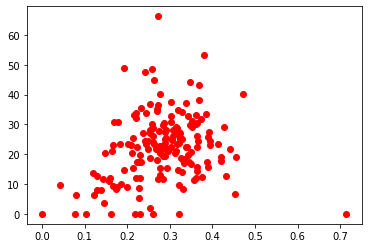

In [76]:
plt.plot(df_combined['native_enc'], df_combined['death_avg'], 'ro')

In [77]:
df_trees

,common_name,scientific_name,zipcode,diameter_breast_height_CM,condition,native,diameter_breast_height_binned_CM,city_ID,most_recent_observation,condition_enc,native_enc
0,Red maple,Acer rubrum,11375.0,7.62,fair,naturally_occurring,0 to 15.24 cm,"180,683",8/27/2015,2.0,1.0
1,Pin oak,Quercus palustris,11357.0,53.34,fair,naturally_occurring,45.72 to 60.96 cm,"200,540",9/3/2015,2.0,1.0
2,Honeylocust,Gleditsia triacanthos,11211.0,7.62,good,introduced,0 to 15.24 cm,"204,026",9/5/2015,3.0,0.0
3,Honeylocust,Gleditsia triacanthos,11211.0,25.40,good,introduced,15.24 to 30.48 cm,"204,337",9/5/2015,3.0,0.0
4,American linden,Tilia americana,11215.0,53.34,good,naturally_occurring,45.72 to 60.96 cm,"189,565",8/30/2015,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
682848,Pin oak,Quercus palustris,11211.0,63.50,good,naturally_occurring,60.96 to 76.2 cm,"155,433",8/18/2015,3.0,1.0
682849,Kentucky yellowwood,Cladrastis kentukea,11375.0,17.78,good,introduced,15.24 to 30.48 cm,"183,795",8/29/2015,3.0,0.0
682850,Red maple,Acer rubrum,10314.0,30.48,good,naturally_occurring,15.24 to 30.48 cm,"166,161",8/22/2015,3.0,1.0
682851,Red maple,Acer rubrum,10457.0,22.86,good,naturally_occurring,15.24 to 30.48 cm,"184,028",8/29/2015,3.0,1.0


In [78]:
df_counts = df_trees.groupby(['zipcode'])['zipcode'].count()
df_counts.to_csv('NYC_tree_count_by_zip.csv')

In [79]:
# checking no multicollinearity OLS assumption

df_combined = df_combined.merge(df_counts, left_on='zip', right_index = True).rename(columns={"zipcode": "tree_count"})
covariates = df_combined[['pc_cover', 'diameter_breast_height_CM', 'condition_enc', 'native_enc', 'tree_count']]
covariates.corr(method='pearson')


,pc_cover,diameter_breast_height_CM,condition_enc,native_enc,tree_count
pc_cover,1.000000,-0.051849,-0.180711,0.083486,0.027083
diameter_breast_height_CM,-0.051849,1.000000,0.442791,0.323314,0.403612
condition_enc,-0.180711,0.442791,1.000000,0.278807,0.225250
native_enc,0.083486,0.323314,0.278807,1.000000,0.273388
tree_count,0.027083,0.403612,0.225250,0.273388,1.000000


In [80]:
df_combined

,zip,population,density,pc_cover,hosp_avg,death_avg,percentpos_avg,diameter_breast_height_CM,condition_enc,native_enc,tree_count
0,10001,25026.0,15489.3,2.612,37.754545,8.792857,5.624769,17.989111,2.809412,0.226415,911
1,10002,74363.0,34916.7,11.836,71.197143,27.155000,7.029615,20.923320,2.714087,0.236893,2265
2,10003,54671.0,36928.8,6.273,27.411765,8.000000,5.488692,22.358272,2.709213,0.129755,2025
3,10004,3310.0,2805.2,24.690,67.271429,0.000000,5.929385,16.768305,2.803419,0.102564,118
4,10005,8664.0,45907.6,2.109,28.066667,0.000000,5.970538,14.834306,2.346154,0.161538,144
...,...,...,...,...,...,...,...,...,...,...,...
172,11691,68454.0,9849.6,22.408,82.045714,48.810526,7.458692,21.335023,2.637449,0.192661,5718
173,11692,22394.0,8511.5,22.596,68.820588,33.050000,7.366923,12.091813,2.485239,0.214650,2013
174,11693,13029.0,5088.1,34.662,62.324138,21.038889,7.904692,17.740890,2.307009,0.165179,1169
175,11694,21258.0,4697.4,3.773,67.843333,33.993750,7.152692,18.811786,2.495277,0.220548,3572
